# imports

In [6]:
import numpy as np
import pandas as pd
from sklearn import datasets as dt
from matplotlib import pyplot as plt
from sklearn import linear_model as lm

# load synthetic data

In [7]:
n_samples=100
n_outliers=5
n_features=1

x, y, coef = dt.make_regression(
    n_samples= n_samples,
    n_features= n_features,
    n_informative= 1,
    noise= 10,
    coef= True,
    random_state= 0
)

# add outliers
x[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, n_features))
y[:n_outliers] = -3 + 10 * np.random.normal(size=(n_outliers))

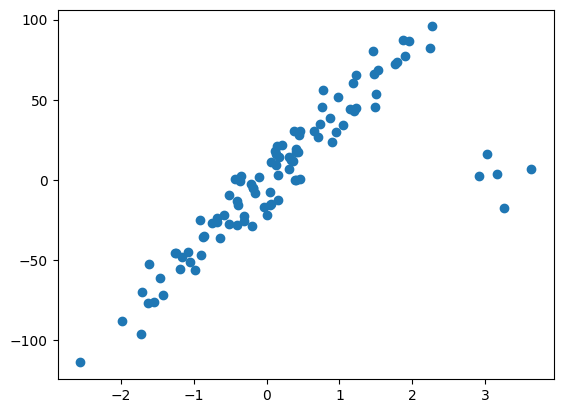

In [8]:
plt.scatter(x, y)

# modeling 

In [15]:
# linear regression
lr = lm.LinearRegression()
lr.fit(x, y)

# lasso - L1 tende a zerar os parametros
lasso = lm.Lasso(alpha= 20)
lasso.fit(x, y)

# ridge L2 smoothing amenizacao dos parametros
ridge = lm.Ridge(alpha=200)
ridge.fit(x,y)

# RANSAC
ransac = lm.RANSACRegressor()
ransac.fit(x, y)
inlier = ransac.inlier_mask_
outlier = np.logical_not(inlier)

# predict

In [11]:
x_plot = np.arange(x.min(), x.max())[:, np.newaxis]
yhat_linearmodel = lr.predict(x_plot)
yhat_lasso = lasso.predict(x_plot)
yhat_ridge = ridge.predict(x_plot)
yhat_ransac = ransac.predict(x_plot)

# graphs

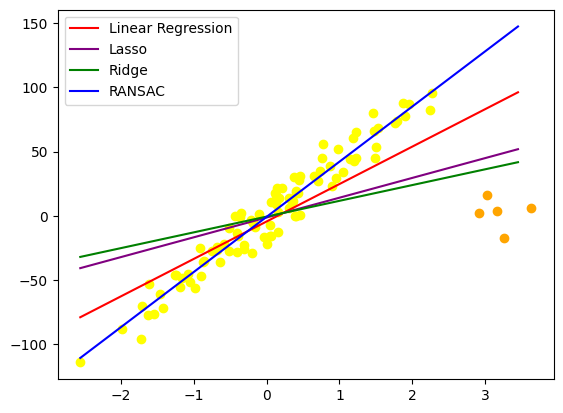

In [18]:
plt.scatter(x[inlier], y[inlier], color='yellow')
plt.scatter(x[outlier], y[outlier], color='orange')


plt.plot(x_plot, yhat_linearmodel, color='red', label='Linear Regression')
plt.plot(x_plot, yhat_lasso, color='purple', label='Lasso')
plt.plot(x_plot, yhat_ridge, color='green', label='Ridge')
plt.plot(x_plot, yhat_ransac, color='blue', label='RANSAC')



plt.legend()


In [22]:
print('linear regression')
lr.coef_

linear regression


array([29.17908041])

In [20]:
coef

array(42.38550486)

In [23]:
print('Lasso')
lasso.coef_


Lasso


array([15.43154166])

In [24]:
print('ridge')
ridge.coef_


ridge


array([12.28720194])

In [25]:
ransac.estimator_.coef_

array([42.99721924])